# Stock Price Prediction Problem

## Loading and Handling Data into Pandas

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [35]:
data = pd.read_csv("C:\\Users\\VIVEK VARMA4\\Desktop\\Major Project\\Normalized-Data\\FB.csv")
print(data.head())
print ('\nData Types:')
print (data.dtypes)

   Unnamed: 0 symbol        date      open      high       low     close  \
0           0     FB  2012-05-18  0.020657  0.021838  0.018921  0.018783   
1           1     FB  2012-05-21  0.017945  0.017791  0.016432  0.016720   
2           2     FB  2012-05-22  0.016020  0.016301  0.015406  0.015231   
3           3     FB  2012-05-23  0.015411  0.015772  0.015615  0.015722   
4           4     FB  2012-05-24  0.016187  0.016116  0.015819  0.016228   

      volume  adj_close  prev_day_diff  50_day_moving_avg  10_day_volatility  \
0  573576400   0.018783       0.000000          38.230000           0.000000   
1  168192700   0.016720      -4.200001          36.129999           2.100000   
2  101786600   0.015231      -3.029999          34.419999           3.419999   
3   73600000   0.015722       1.000000          33.814999           1.814999   
4   50237200   0.016228       1.029999          33.657999           0.628000   

   s&p_index_open  s&p_index_high  s&p_index_low  s&p_index_cl

Reading as datetime format:

In [36]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
# dateparse('1962-01')
data = pd.read_csv("C:\\Users\\VIVEK VARMA4\\Desktop\\Major Project\\Normalized-Data\\FB.csv", parse_dates= ['date'], \
                   index_col='date',date_parser=dateparse)
print(data.head())

            Unnamed: 0 symbol      open      high       low     close  \
date                                                                    
2012-05-18           0     FB  0.020657  0.021838  0.018921  0.018783   
2012-05-21           1     FB  0.017945  0.017791  0.016432  0.016720   
2012-05-22           2     FB  0.016020  0.016301  0.015406  0.015231   
2012-05-23           3     FB  0.015411  0.015772  0.015615  0.015722   
2012-05-24           4     FB  0.016187  0.016116  0.015819  0.016228   

               volume  adj_close  prev_day_diff  50_day_moving_avg  \
date                                                                 
2012-05-18  573576400   0.018783       0.000000          38.230000   
2012-05-21  168192700   0.016720      -4.200001          36.129999   
2012-05-22  101786600   0.015231      -3.029999          34.419999   
2012-05-23   73600000   0.015722       1.000000          33.814999   
2012-05-24   50237200   0.016228       1.029999          33.657999  

<ipython-input-36-dd1dbcb542c8>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


In [37]:
#check datatype of index
data.index

DatetimeIndex(['2012-05-18', '2012-05-21', '2012-05-22', '2012-05-23',
               '2012-05-24', '2012-05-25', '2012-05-29', '2012-05-30',
               '2012-05-31', '2012-06-01',
               ...
               '2016-02-24', '2016-02-25', '2016-02-26', '2016-02-29',
               '2016-03-01', '2016-03-02', '2016-03-03', '2016-03-04',
               '2016-03-07', '2016-03-08'],
              dtype='datetime64[ns]', name='date', length=956, freq=None)

In [38]:
#convert to time series:
ts = data['adj_close']
ts.head(10)

date
2012-05-18    0.018783
2012-05-21    0.016720
2012-05-22    0.015231
2012-05-23    0.015722
2012-05-24    0.016228
2012-05-25    0.015678
2012-05-29    0.014170
2012-05-30    0.013850
2012-05-31    0.014543
2012-06-01    0.013619
Name: adj_close, dtype: float64

### Indexing TS arrays:

In [39]:
#1. Specific the index as a string constant:
ts['2012-05-18']

0.0187830686681

In [40]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(2015, 3, 26)]

0.0407842680541

#Get range:

In [41]:
#1. Specify the entire range:
ts['2012-05-18':'2015-03-26']

date
2012-05-18    0.018783
2012-05-21    0.016720
2012-05-22    0.015231
2012-05-23    0.015722
2012-05-24    0.016228
                ...   
2015-03-20    0.041172
2015-03-23    0.041482
2015-03-24    0.041914
2015-03-25    0.040740
2015-03-26    0.040784
Name: adj_close, Length: 717, dtype: float64

In [42]:
#2. Use ':' if one of the indices is at ends:
ts[:'2015-03-26']

date
2012-05-18    0.018783
2012-05-21    0.016720
2012-05-22    0.015231
2012-05-23    0.015722
2012-05-24    0.016228
                ...   
2015-03-20    0.041172
2015-03-23    0.041482
2015-03-24    0.041914
2015-03-25    0.040740
2015-03-26    0.040784
Name: adj_close, Length: 717, dtype: float64

Note: ends included here

In [43]:
#All rows of 1962:
ts['2012']

date
2012-05-18    0.018783
2012-05-21    0.016720
2012-05-22    0.015231
2012-05-23    0.015722
2012-05-24    0.016228
                ...   
2012-12-24    0.013231
2012-12-26    0.013025
2012-12-27    0.012799
2012-12-28    0.012730
2012-12-31    0.013079
Name: adj_close, Length: 155, dtype: float64

# Checking for stationarity

## Plot the time-series

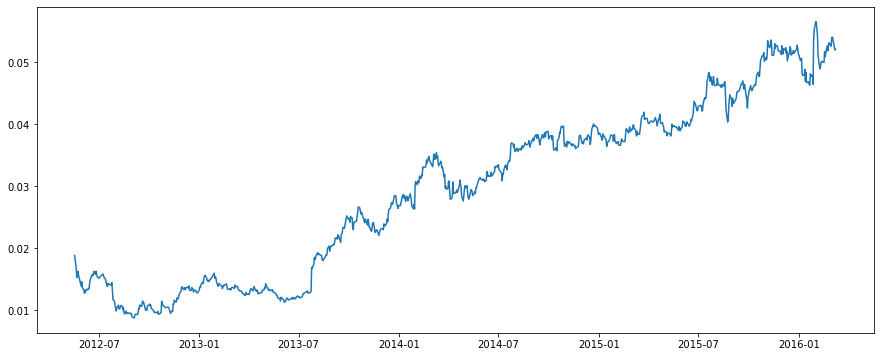

In [44]:
plt.plot(ts)

### Function for testing stationarity

In [45]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=20).mean()
    rolstd = pd.Series(timeseries).rolling(window=20).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['open','high','10_day_volatility', '50_day_moving_avg'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

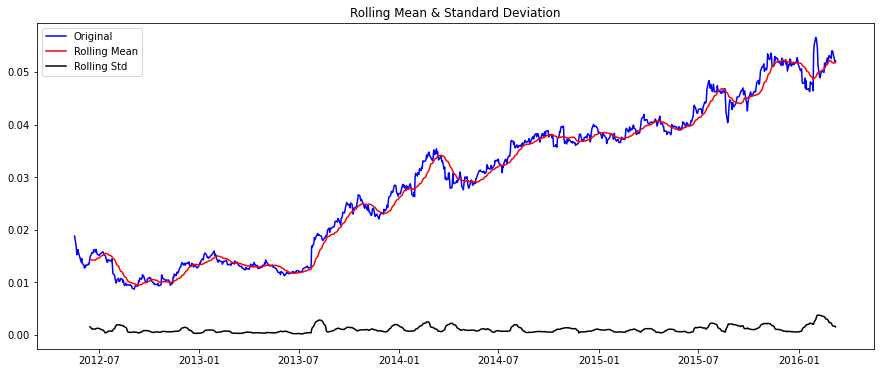

Results of Dickey-Fuller Test:
open                     -0.026673
high                      0.956270
10_day_volatility         6.000000
50_day_moving_avg       949.000000
Critical Value (1%)      -3.437259
Critical Value (5%)      -2.864590
Critical Value (10%)     -2.568394
dtype: float64


In [46]:
test_stationarity(ts)

# Making Data Stationary


## Estimating & Eliminating Trend


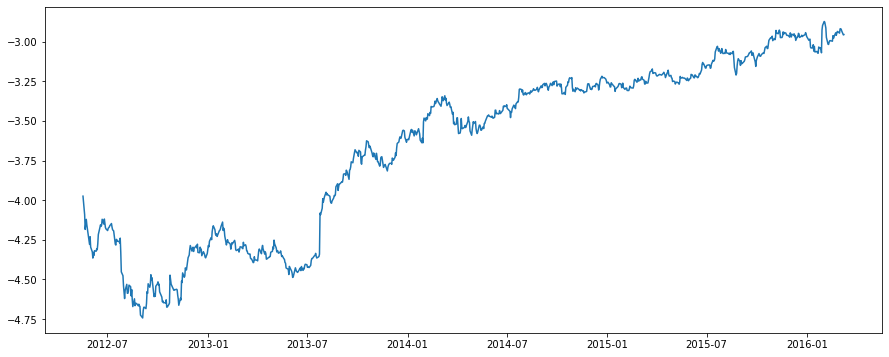

In [47]:
ts_log = np.log(ts)
plt.plot(ts_log)

## Smoothing:

### Moving average

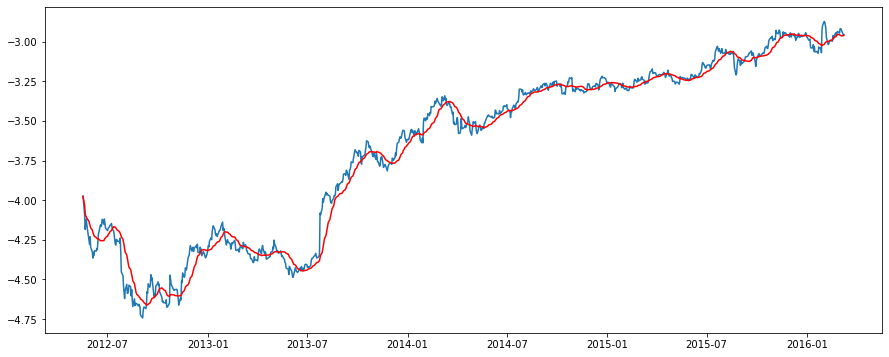

In [48]:
moving_avg = ts_log.rolling(20, min_periods=1).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [17]:
print (moving_avg)

date
2012-05-18   -3.974799
2012-05-21   -4.032988
2012-05-22   -4.083470
2012-05-23   -4.100773
2012-05-24   -4.104820
                ...   
2016-03-02   -2.961032
2016-03-03   -2.962431
2016-03-04   -2.963391
2016-03-07   -2.962599
2016-03-08   -2.959594
Name: adj_close, Length: 956, dtype: float64


In [18]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(15)

date
2012-05-18    0.000000
2012-05-21   -0.058189
2012-05-22   -0.100963
2012-05-23   -0.051911
2012-05-24   -0.016184
2012-05-25   -0.042234
2012-05-29   -0.122906
2012-05-30   -0.127489
2012-05-31   -0.069940
2012-06-01   -0.122004
2012-06-04   -0.138211
2012-06-05   -0.162482
2012-06-06   -0.117038
2012-06-07   -0.126159
2012-06-08   -0.090136
Name: adj_close, dtype: float64

In [19]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

date
2012-05-18    0.000000
2012-05-21   -0.058189
2012-05-22   -0.100963
2012-05-23   -0.051911
2012-05-24   -0.016184
Name: adj_close, dtype: float64

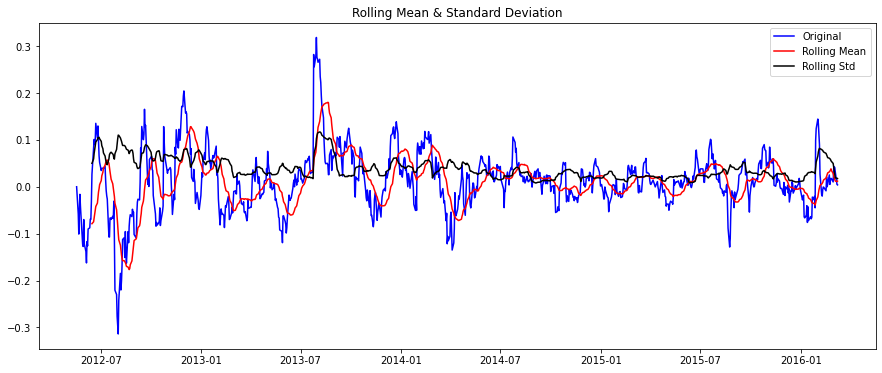

Results of Dickey-Fuller Test:
open                   -6.121651e+00
high                    8.825796e-08
10_day_volatility       0.000000e+00
50_day_moving_avg       9.550000e+02
Critical Value (1%)    -3.437216e+00
Critical Value (5%)    -2.864571e+00
Critical Value (10%)   -2.568384e+00
dtype: float64


In [20]:
test_stationarity(ts_log_moving_avg_diff)

### Exponentially Weighted Moving Average

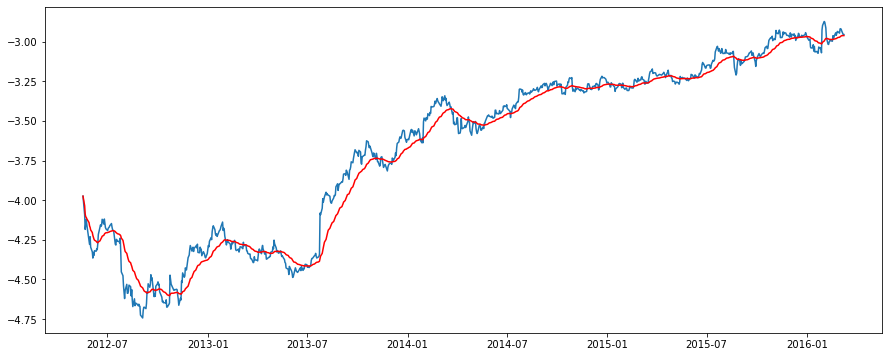

In [21]:
expwighted_avg =  ts_log.ewm(halflife=12,).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')

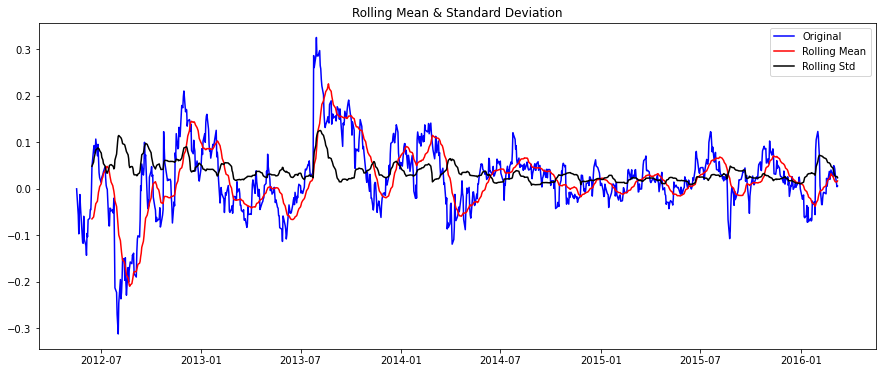

Results of Dickey-Fuller Test:
open                     -5.193435
high                      0.000009
10_day_volatility         0.000000
50_day_moving_avg       955.000000
Critical Value (1%)      -3.437216
Critical Value (5%)      -2.864571
Critical Value (10%)     -2.568384
dtype: float64


In [22]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

## Eliminating Trend and Seasonality

### Differencing:

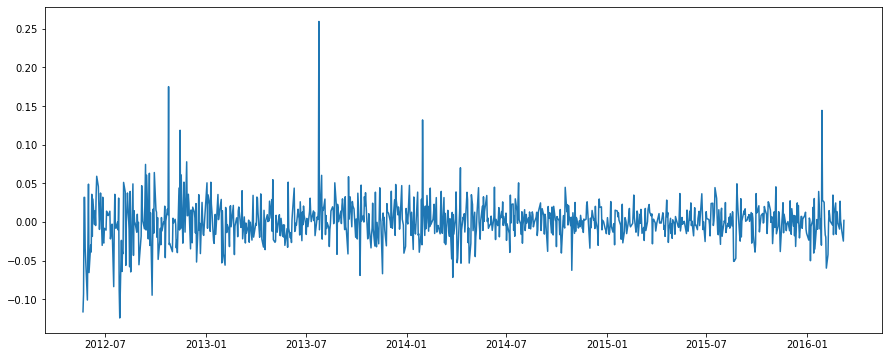

In [23]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

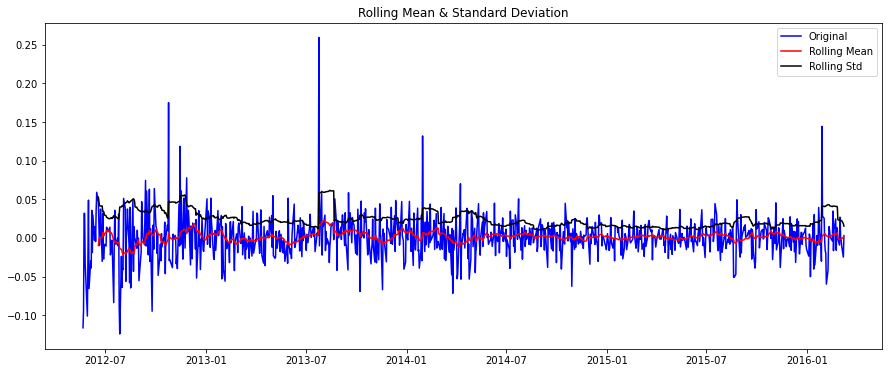

Results of Dickey-Fuller Test:
open                    -30.458521
high                      0.000000
10_day_volatility         0.000000
50_day_moving_avg       954.000000
Critical Value (1%)      -3.437223
Critical Value (5%)      -2.864574
Critical Value (10%)     -2.568386
dtype: float64


In [24]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### Decomposition:

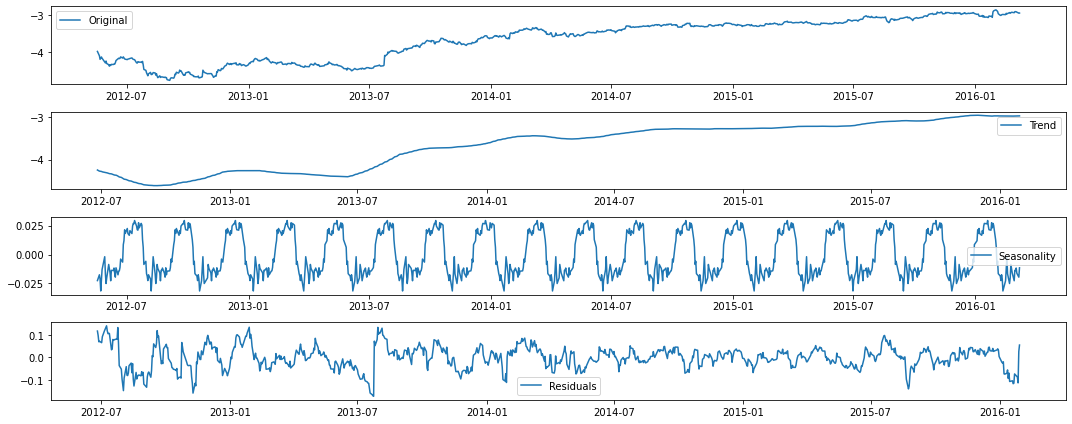

In [25]:
# Decomposition provides a useful abstract model for thinking about time series generally and for 
#better understanding problems during time series analysis and forecasting. 
#time series decomposition and how to automatically split a time series into its components with Python.

#    Level: The average value in the series.
#    Trend: The increasing or decreasing value in the series.
#   Seasonality: The repeating short-term cycle in the series.
#    Noise or Residuals: The random variation in the series.

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, period=52)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

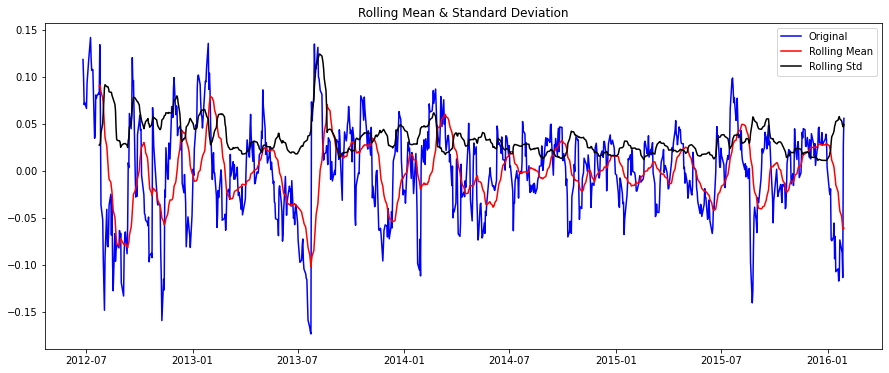

Results of Dickey-Fuller Test:
open                   -7.820168e+00
high                    6.703107e-12
10_day_volatility       7.000000e+00
50_day_moving_avg       8.960000e+02
Critical Value (1%)    -3.437669e+00
Critical Value (5%)    -2.864771e+00
Critical Value (10%)   -2.568490e+00
dtype: float64


In [26]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

# Final Forecasting

In [27]:
from statsmodels.tsa.arima_model import ARIMA

### ACF & PACF Plots

C:\Users\VIVEK VARMA4\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


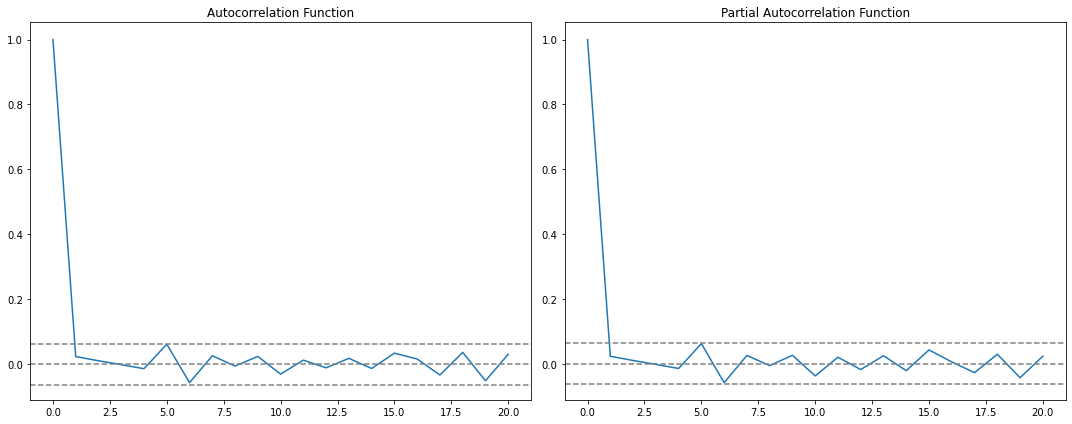

In [28]:
#In the statistical analysis of time series, autoregressive–moving-average (ARMA) models provide a 
#parsimonious description of a (weakly) stationary stochastic process in terms of two polynomials, 
#one for the autoregression (AR) and the second for the moving average (MA).
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### AR Model:

C:\Users\VIVEK VARMA4\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\VIVEK VARMA4\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associ

Text(0.5, 1.0, 'RSS: 0.6808')

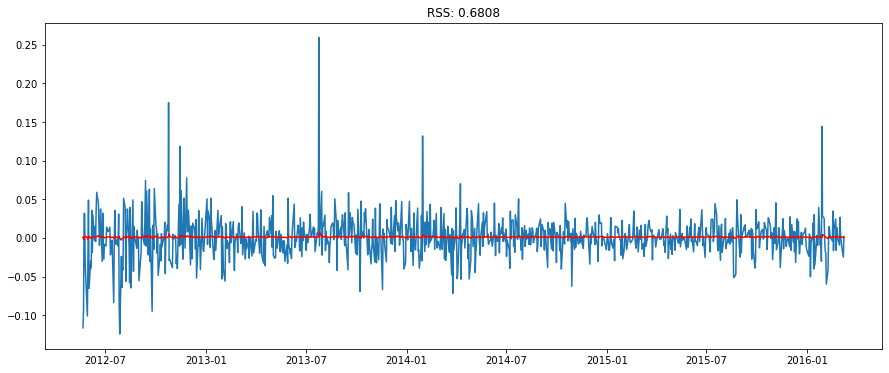

In [29]:
#AR model:
# a time series is said to be AR when present value of the time series can be obtained using previous 
#values of the same time series i.e the present value is weighted average of its past values.
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

### MA Model

C:\Users\VIVEK VARMA4\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\VIVEK VARMA4\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Text(0.5, 1.0, 'RSS: 0.6808')

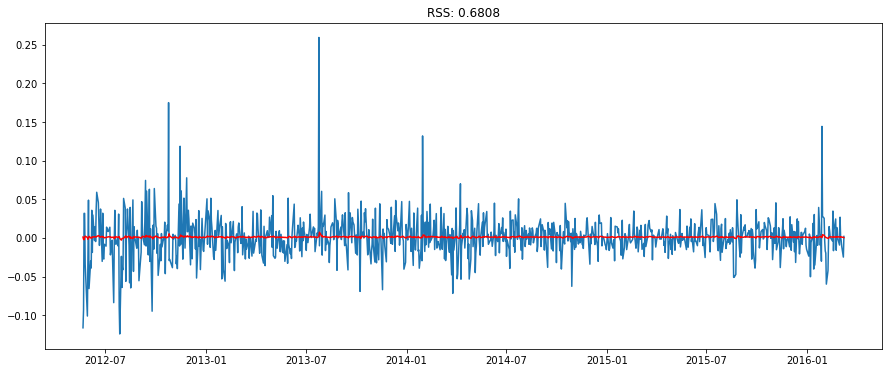

In [30]:
# a process where the present value of series is defined as a linear combination of past errors. 
#We assume the errors to be independently distributed with the normal distribution.
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### ARIMA Model:

C:\Users\VIVEK VARMA4\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\VIVEK VARMA4\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\VIVEK VARMA4\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace f

Text(0.5, 1.0, 'RSS (Root Squared Sum): 0.6766')

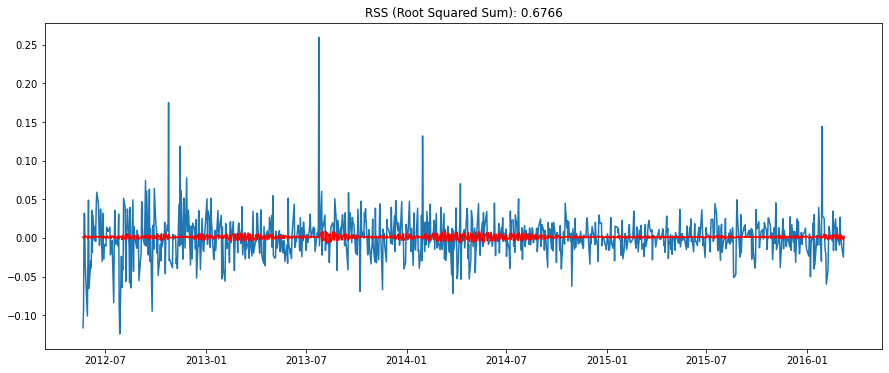

In [33]:
#ARIMA, short for 'Auto Regressive Integrated Moving Average' is actually a class of models that 'explains' 
#a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so 
#that equation can be used to forecast future values.
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS (Root Squared Sum): %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### Convert to original scale:

In [32]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

date
2012-05-21    0.001067
2012-05-22    0.001249
2012-05-23   -0.000572
2012-05-24    0.000660
2012-05-25    0.003354
dtype: float64


In [43]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

date
2012-05-21    0.001067
2012-05-22    0.002316
2012-05-23    0.001745
2012-05-24    0.002405
2012-05-25    0.005759
dtype: float64


In [44]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

date
2012-05-18   -3.974799
2012-05-21   -3.973732
2012-05-22   -3.972483
2012-05-23   -3.973055
2012-05-24   -3.972394
dtype: float64

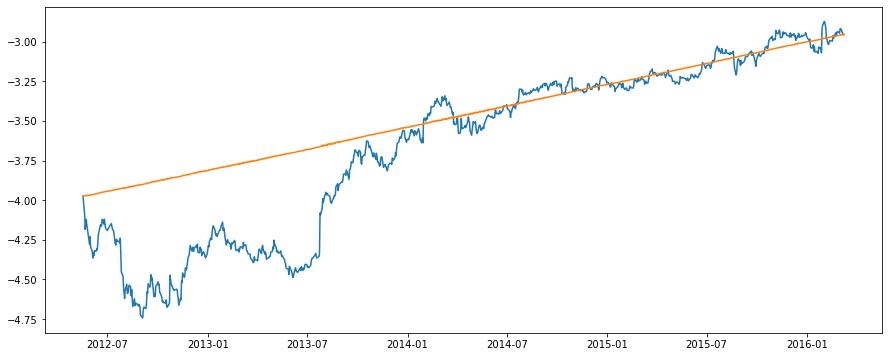

In [45]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

Text(0.5, 1.0, 'RMSE: 0.0059')

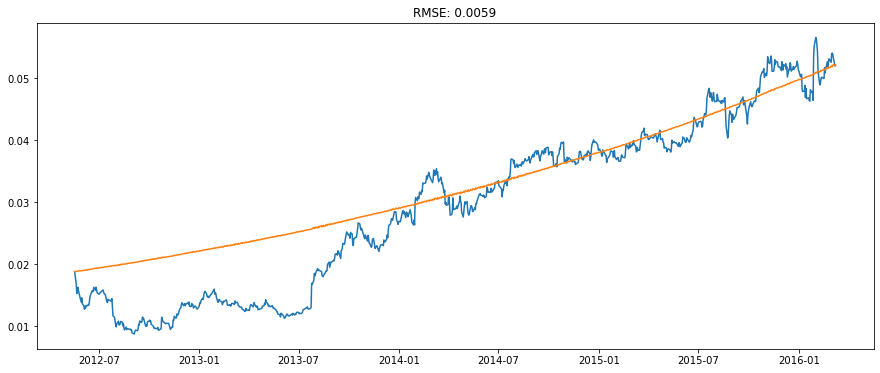

In [46]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))